In [ ]:
#Partie faite localement après l'extraction du corpus

'''

import glob
import re

def remove_xml_tags(text):
    return re.sub(r'<[^>]*>', '', text)

folders = ['en', 'fr', 'es', 'el', 'fi', 'nl']
file_pattern = '*.txt'

for folder_path in folders:
    print(f"Traitement du dossier : {folder_path}")

    output_file = f'{folder_path}.txt'

    with open(output_file, 'w', encoding='utf-8') as outfile:

        for file_path in glob.glob(f"{folder_path}/{file_pattern}"):
            print(f"Traitement du fichier : {file_path}")

            with open(file_path, 'r', encoding='utf-8') as file:
                data = file.read()

            cleaned_data = remove_xml_tags(data)

            outfile.write(cleaned_data)

    print(f"Les fichiers du dossier '{folder_path}' ont été concaténés dans '{output_file}'.")

'''

'\nfor folder_path in folders:\n    print(f"Traitement du dossier : {folder_path}")\n\n    output_file = f\'{folder_path}.txt\'\n\n    with open(output_file, \'w\', encoding=\'utf-8\') as outfile:\n\n        for file_path in glob.glob(f"{folder_path}/{file_pattern}"):\n            print(f"Traitement du fichier : {file_path}")\n\n            with open(file_path, \'r\', encoding=\'utf-8\') as file:\n                data = file.read()\n\n            cleaned_data = remove_xml_tags(data)\n\n            outfile.write(cleaned_data)\n\n    print(f"Les fichiers du dossier \'{folder_path}\' ont été concaténés dans \'{output_file}\'.")\n'

In [ ]:
import re
def read_corpus (file_path) :
  with open (file_path,"r") as infile :
    content = infile.read()
    content=content.lower()
    content = re.sub(r"[^\w\s']",' ',content)
    content = re.sub(r'\s+',' ',content)
  return content
text = read_corpus("fr.txt")
print(text)

Buffered data was truncated after reaching the output size limit.

In [ ]:
import nltk
nltk.download('punkt')
def split_corpus (content,lang ="finnish") :
  # Split ‘content ’ into words depending of language specified by ‘lang ’
  splitted_content = []
  splitted_content = nltk.tokenize.word_tokenize(content, lang)
  return splitted_content
#text_split = split_corpus(text)
#print(text_split)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def content_to_dict ( splitted_content ) :
    content_dict = {}
    for word in splitted_content:
        if word in content_dict:
            content_dict[word] += 1
        else:
            content_dict[word] = 1

    return content_dict

def content_to_list ( content_dict ) :
    content_list = []
    for word, freq in content_dict.items():
        content_list.append([word, freq])
        content_list = sorted(content_list, reverse = True, key=lambda x : x[1])
    return content_list

#text_dict = content_to_dict(text_split)
#print(text_dict)
#text_list = content_to_list(text_dict)
#print(text_list)

In [ ]:
def compute_zipf (content_list) :
  c = content_list[0][1]
  for i in range(len(content_list)):
    content_list[i].append((1/(i+1))*c)
  return content_list

#text_zipf = compute_zipf(text_list)
#print(text_zipf)

In [ ]:
def print_stats (content_list , n) :
  index = ['Rank', 'Word', 'Frequency', 'Expected (zipf)']
  print(f"{index[0]:<2} {index[1]:<10} {index[2]:<6} {index[3]:<6}")
  print("_"*50)
  for i in range(n):
    print(f"{i:<5} {content_list[i][0]:<10} {content_list[i][1]:<8} {content_list[i][2]:<6}")

#print_stats(text_zipf, 10)

In [ ]:
import matplotlib.pyplot as pyplot

def plot_zipf (content_list, log = False , num_words = 150) :
  pyplot.rcParams ['figure.figsize'] = [15 , 10]
  content_list = content_list[:num_words]
  rank = list(range(1, num_words+1))
  frequency = []
  frequency_zipf = []
  for item in content_list:
    frequ = item[1]
    frequ_zipf = item[2]
    frequency.append(frequ)
    frequency_zipf.append(frequ_zipf)

  if log == True:
    pyplot.xscale('log')
    pyplot.yscale('log')

  pyplot.plot(rank, frequency, label='Frequency')
  pyplot.plot(rank, frequency_zipf, '--', label='Expected (Zipf)')

  pyplot.legend()
  pyplot.title('Zipf\'s law')
  pyplot.xlabel('Rank')
  pyplot.ylabel('Frequency')

#plot_zipf(text_zipf, num_words = 150, log = False)

Traitement du fichier : data/greek.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     και        2368     2368.0
1     να         2248     1184.0
2     της        2029     789.3333333333333
3     την        1650     592.0 
4     το         1641     473.6 
5     για        1394     394.66666666666663
6     του        1302     338.2857142857143
7     η          1287     296.0 
8     των        1166     263.1111111111111
9     που        1113     236.8 


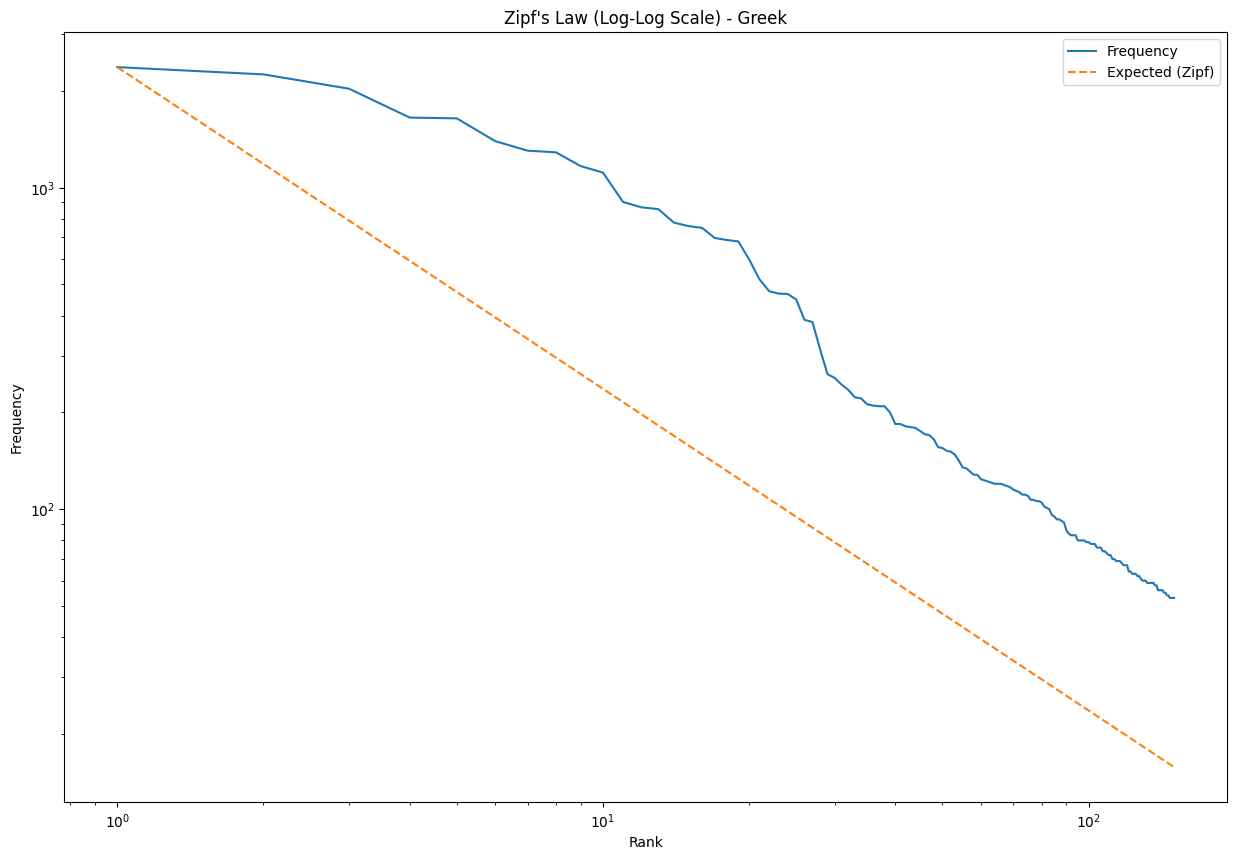

Traitement du fichier : data/dutch.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         6174     6174.0
1     van        3244     3087.0
2     het        2693     2058.0
3     en         1985     1543.5
4     een        1602     1234.8000000000002
5     dat        1571     1029.0
6     in         1443     882.0 
7     is         1099     771.75
8     te         1089     686.0 
9     voor       984      617.4000000000001


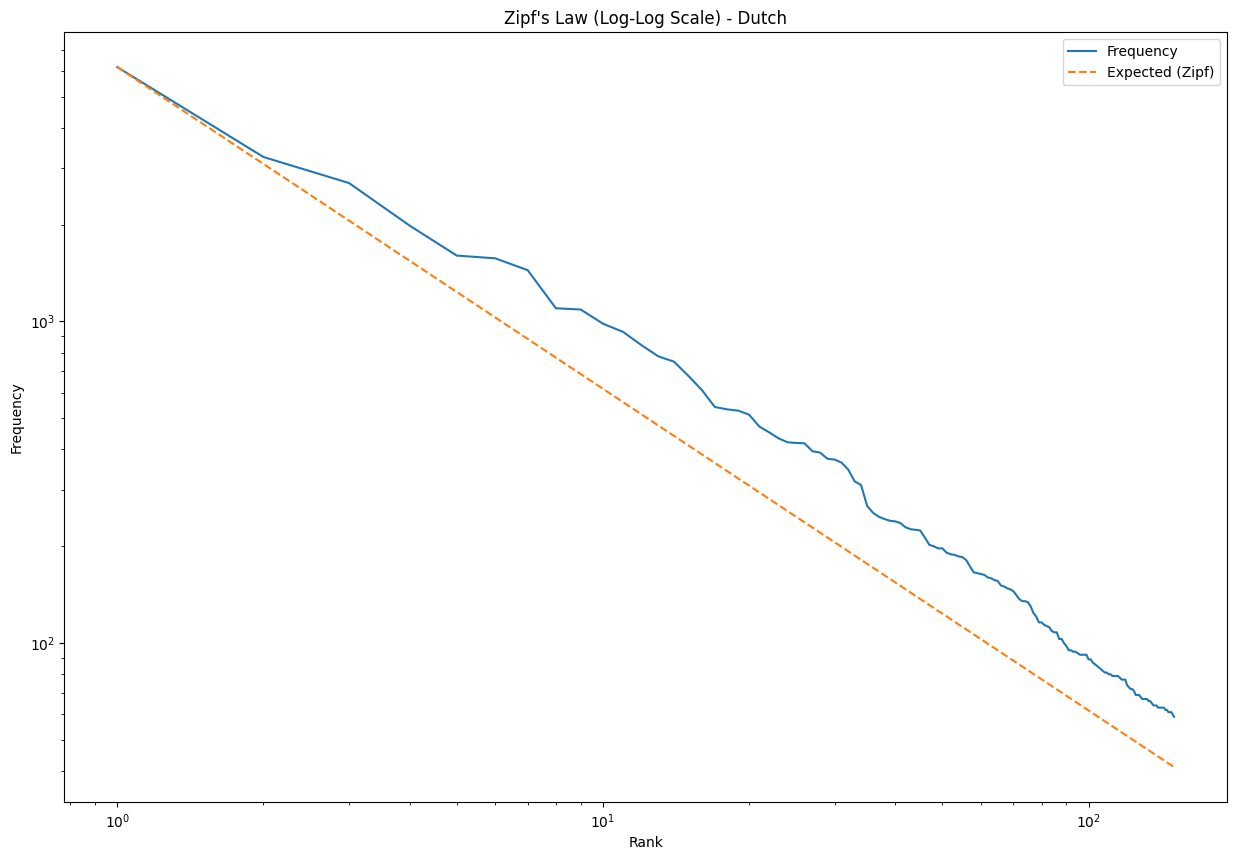

Traitement du fichier : data/finnish.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     ja         2035     2035.0
1     on         1700     1017.5
2     että       945      678.3333333333333
3     ei         469      508.75
4     euroopan   468      407.0 
5     myös       273      339.16666666666663
6     ovat       251      290.7142857142857
7     ole        251      254.375
8     se         244      226.1111111111111
9     arvoisa    234      203.5 


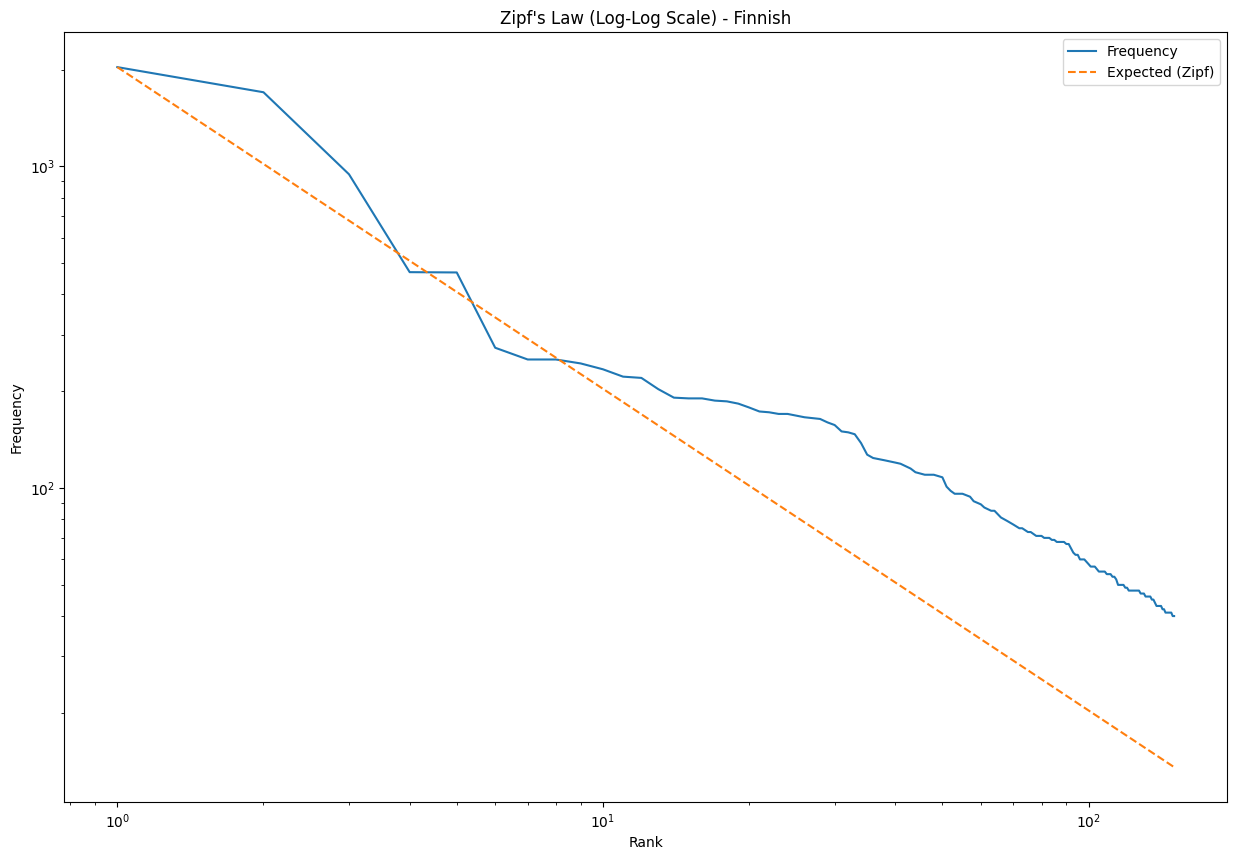

Traitement du fichier : data/english.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     the        6788     6788.0
1     of         3122     3394.0
2     to         2900     2262.6666666666665
3     and        2293     1697.0
4     in         1929     1357.6000000000001
5     that       1651     1131.3333333333333
6     a          1535     969.7142857142857
7     is         1285     848.5 
8     i          1075     754.2222222222222
9     this       1053     678.8000000000001


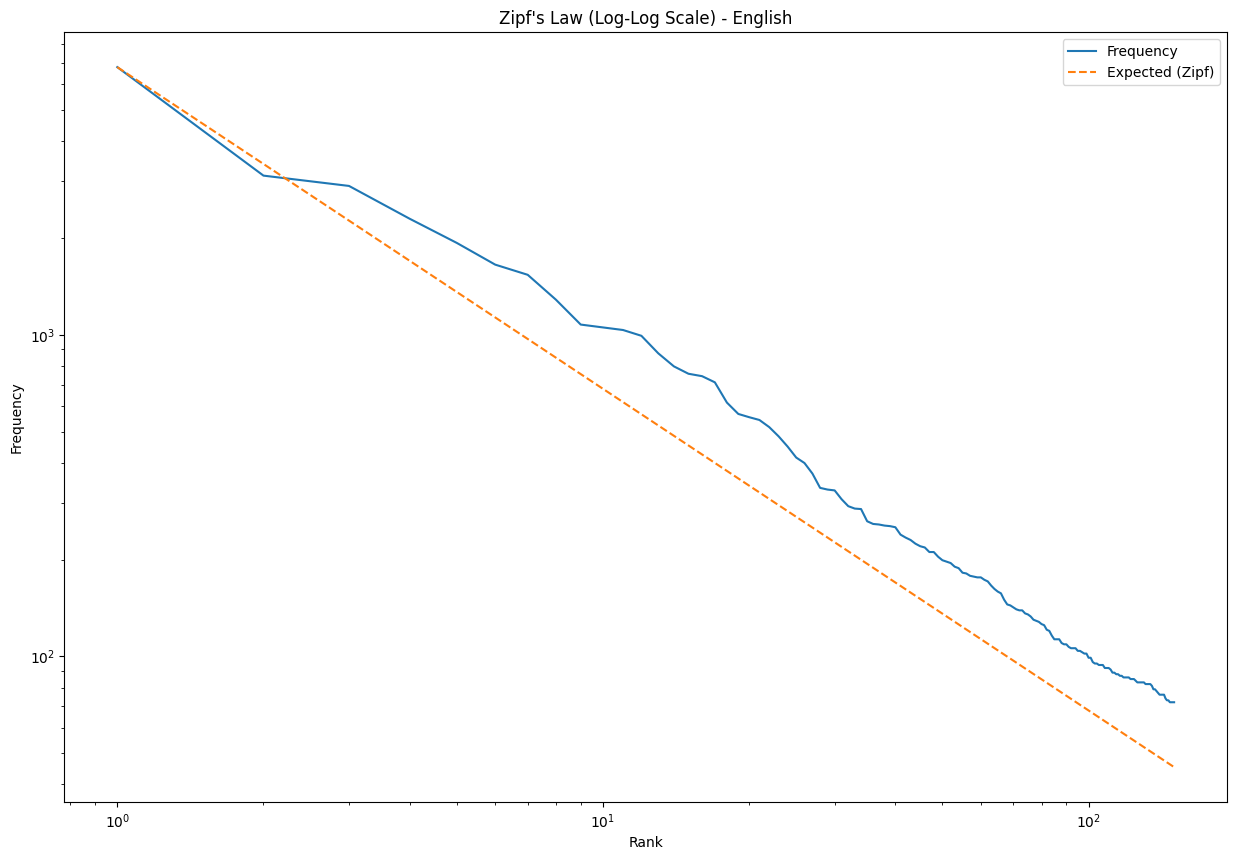

Traitement du fichier : data/french.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         4328     4328.0
1     la         2762     2164.0
2     le         2041     1442.6666666666665
3     l          2028     1082.0
4     et         1928     865.6 
5     à          1925     721.3333333333333
6     les        1659     618.2857142857142
7     des        1458     541.0 
8     que        1376     480.88888888888886
9     d          1292     432.8 


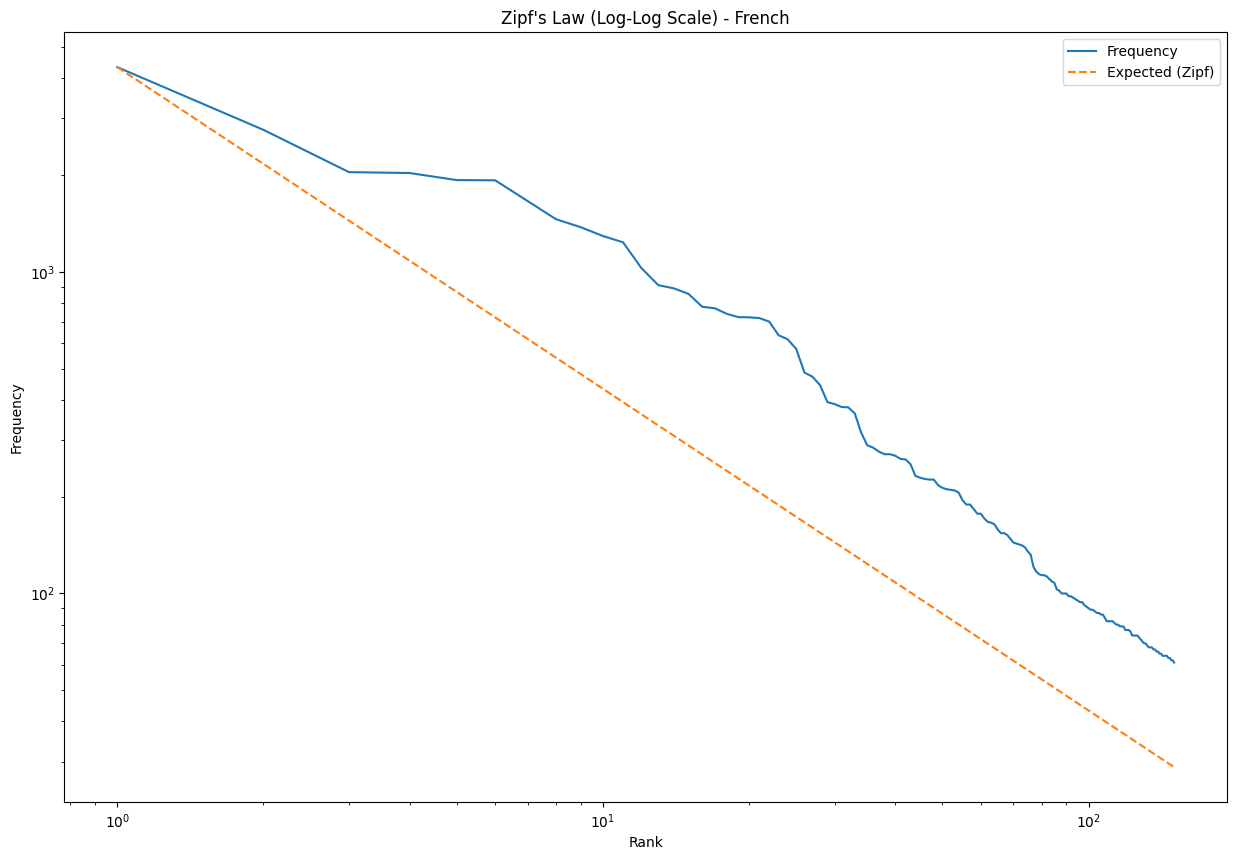

Traitement du fichier : data/spanish.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         5583     5583.0
1     la         3781     2791.5
2     que        3034     1861.0
3     en         2476     1395.75
4     el         2374     1116.6000000000001
5     y          1968     930.5 
6     a          1939     797.5714285714286
7     los        1692     697.875
8     las        987      620.3333333333333
9     se         906      558.3000000000001


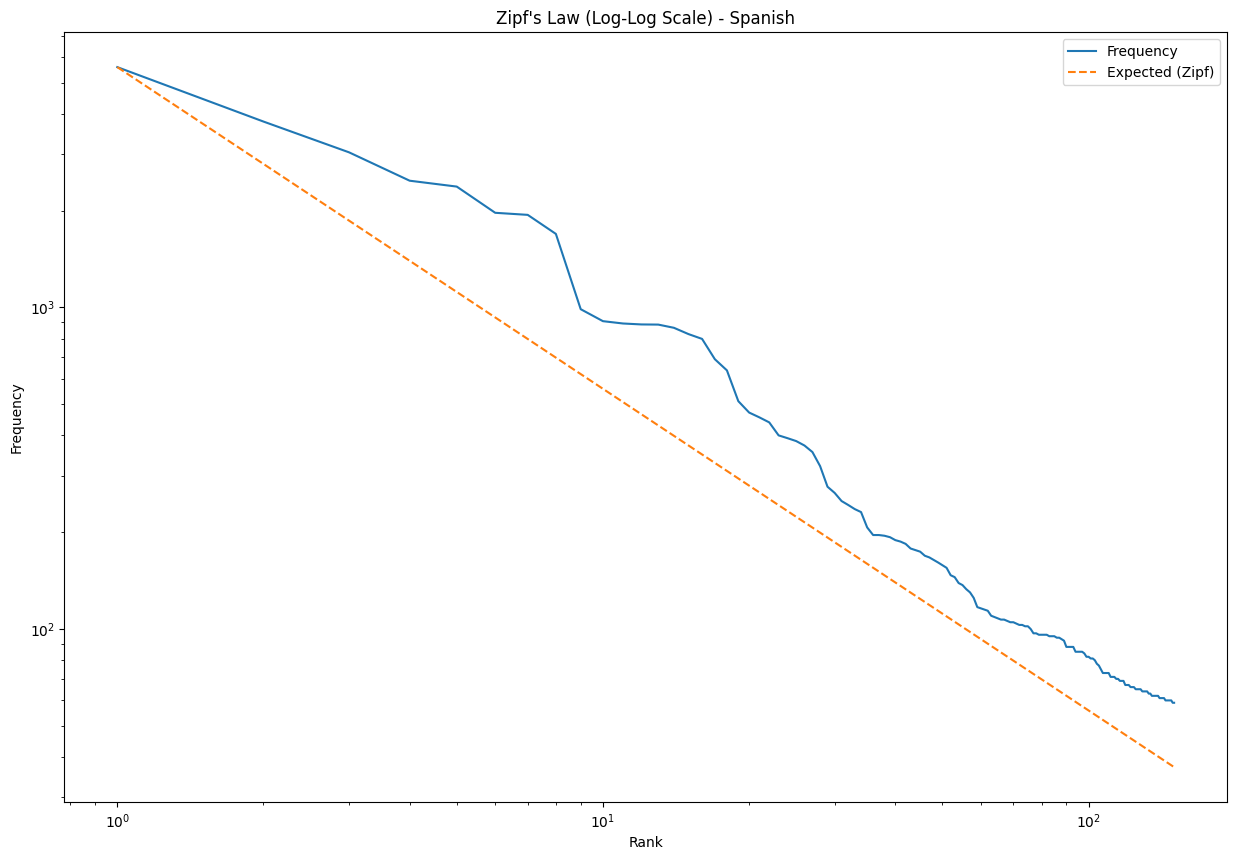

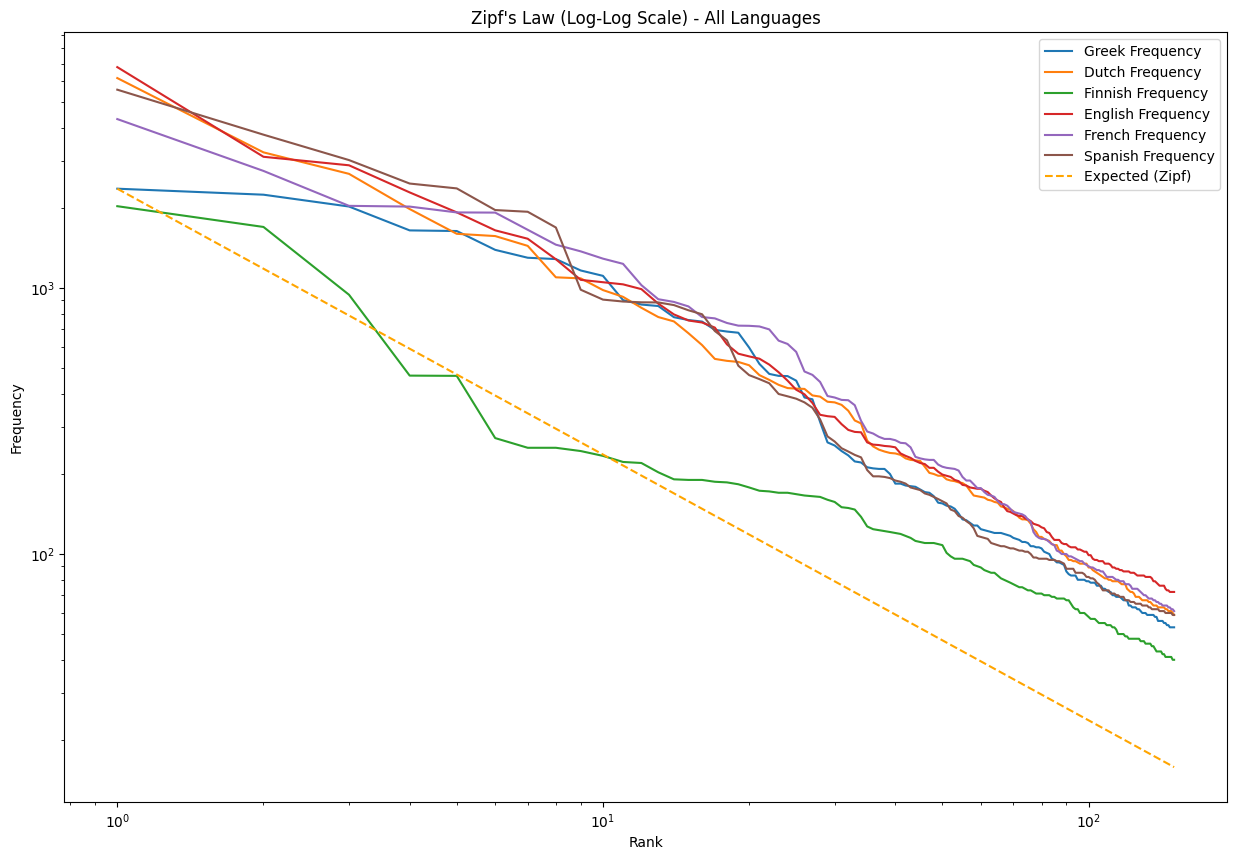

Traitement du fichier : data/greek.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     και        2368     2368.0
1     να         2248     1184.0
2     της        2029     789.3333333333333
3     την        1650     592.0 
4     το         1641     473.6 
5     για        1394     394.66666666666663
6     του        1302     338.2857142857143
7     η          1287     296.0 
8     των        1166     263.1111111111111
9     που        1113     236.8 


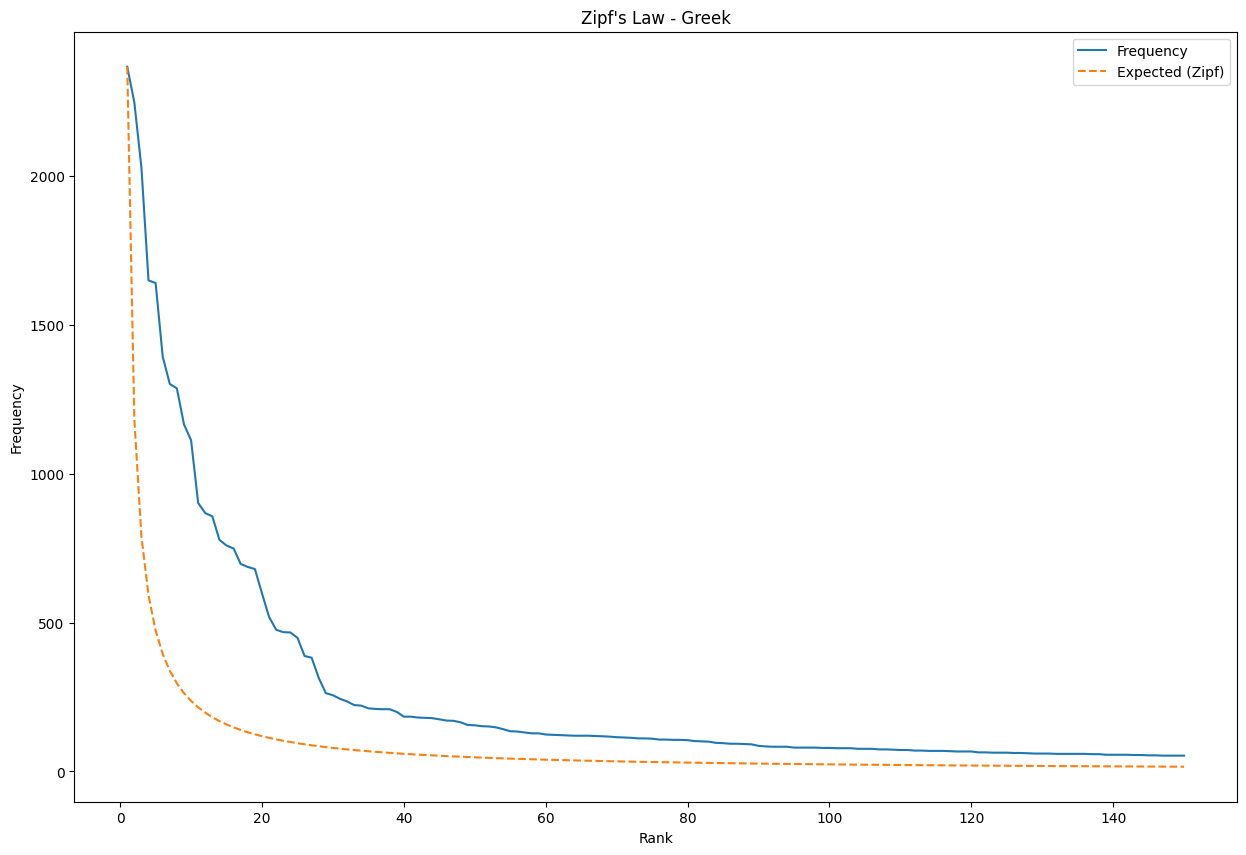

Traitement du fichier : data/dutch.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         6174     6174.0
1     van        3244     3087.0
2     het        2693     2058.0
3     en         1985     1543.5
4     een        1602     1234.8000000000002
5     dat        1571     1029.0
6     in         1443     882.0 
7     is         1099     771.75
8     te         1089     686.0 
9     voor       984      617.4000000000001


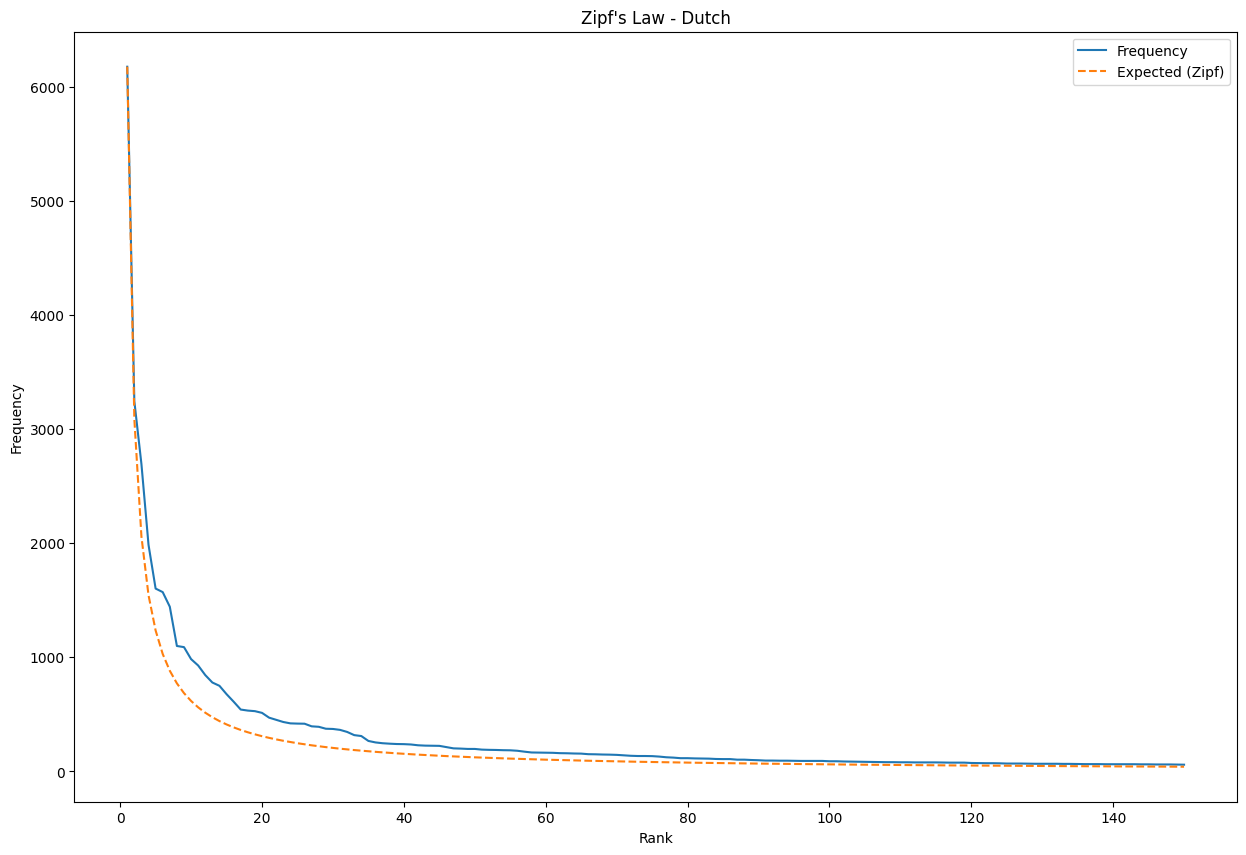

Traitement du fichier : data/finnish.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     ja         2035     2035.0
1     on         1700     1017.5
2     että       945      678.3333333333333
3     ei         469      508.75
4     euroopan   468      407.0 
5     myös       273      339.16666666666663
6     ovat       251      290.7142857142857
7     ole        251      254.375
8     se         244      226.1111111111111
9     arvoisa    234      203.5 


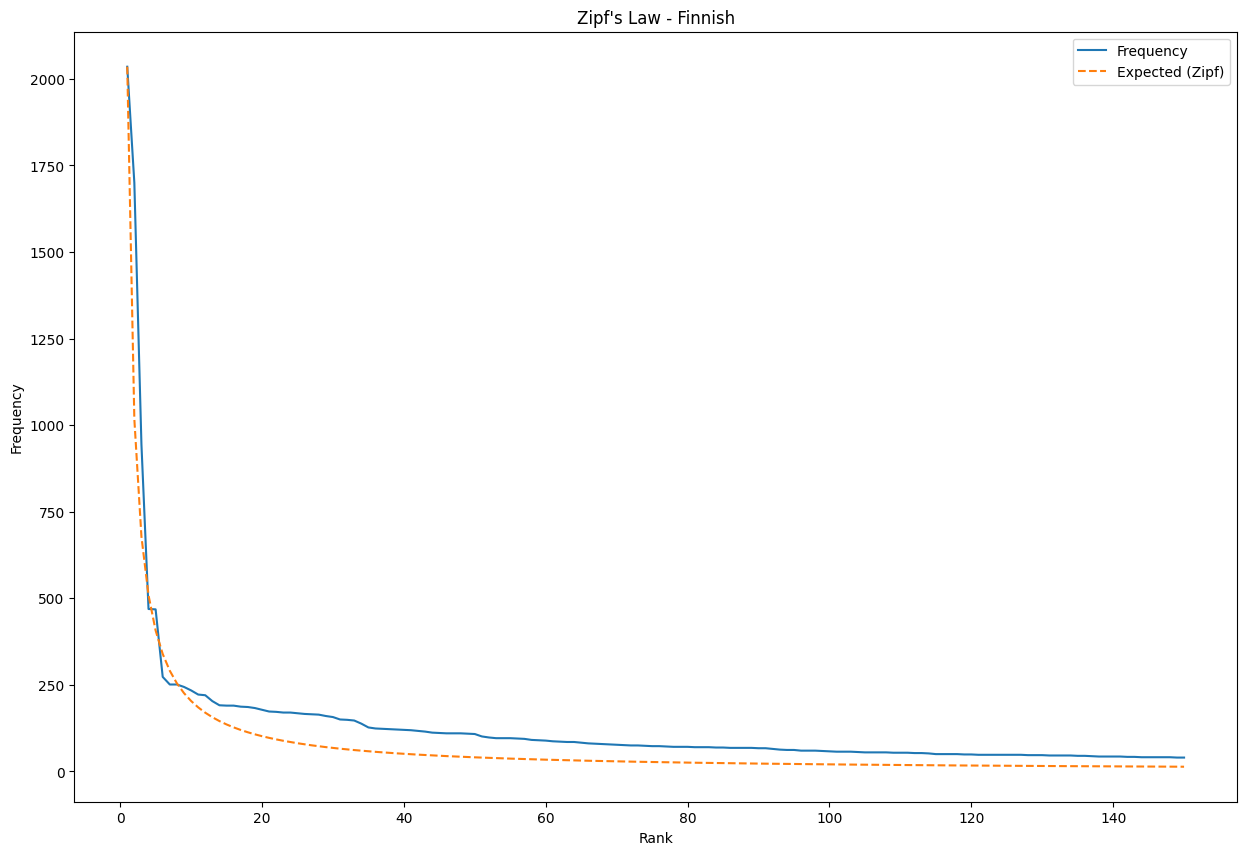

Traitement du fichier : data/english.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     the        6788     6788.0
1     of         3122     3394.0
2     to         2900     2262.6666666666665
3     and        2293     1697.0
4     in         1929     1357.6000000000001
5     that       1651     1131.3333333333333
6     a          1535     969.7142857142857
7     is         1285     848.5 
8     i          1075     754.2222222222222
9     this       1053     678.8000000000001


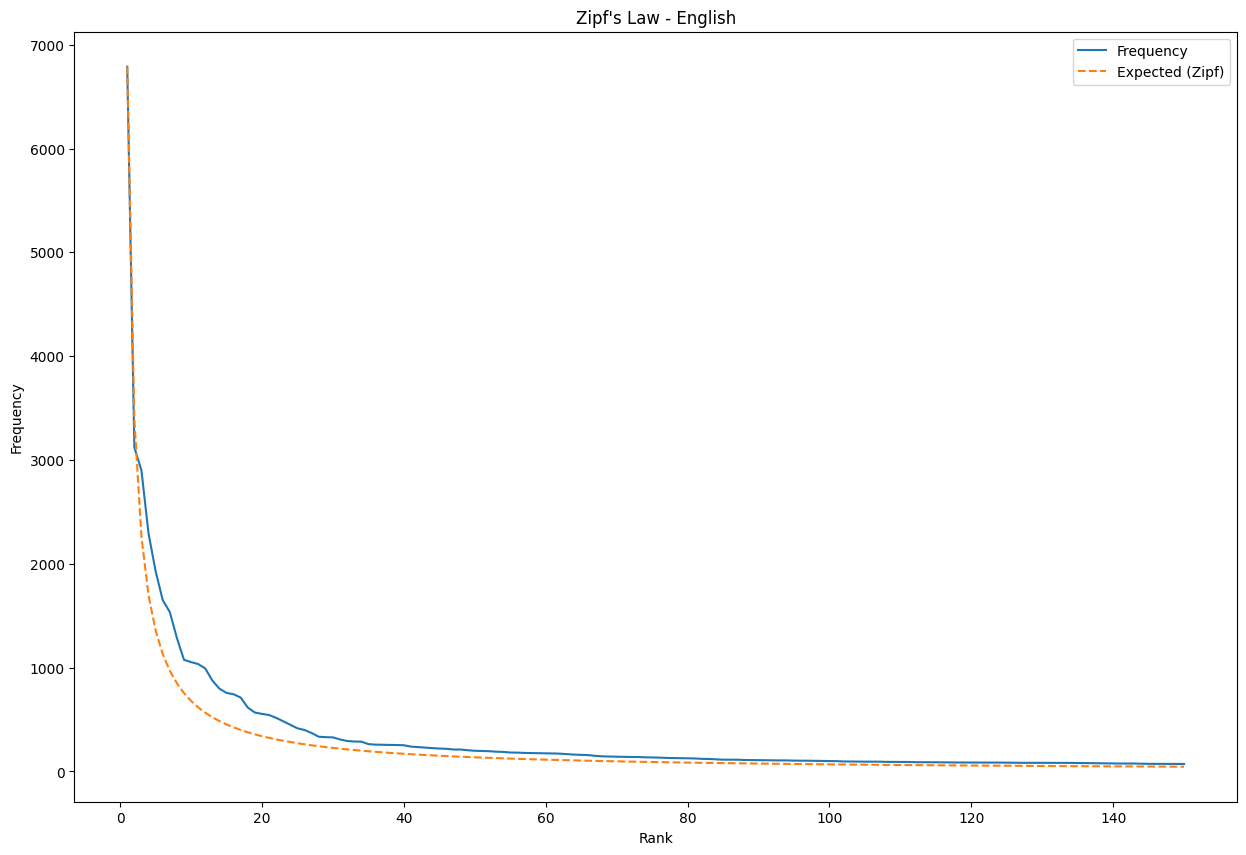

Traitement du fichier : data/french.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         4328     4328.0
1     la         2762     2164.0
2     le         2041     1442.6666666666665
3     l          2028     1082.0
4     et         1928     865.6 
5     à          1925     721.3333333333333
6     les        1659     618.2857142857142
7     des        1458     541.0 
8     que        1376     480.88888888888886
9     d          1292     432.8 


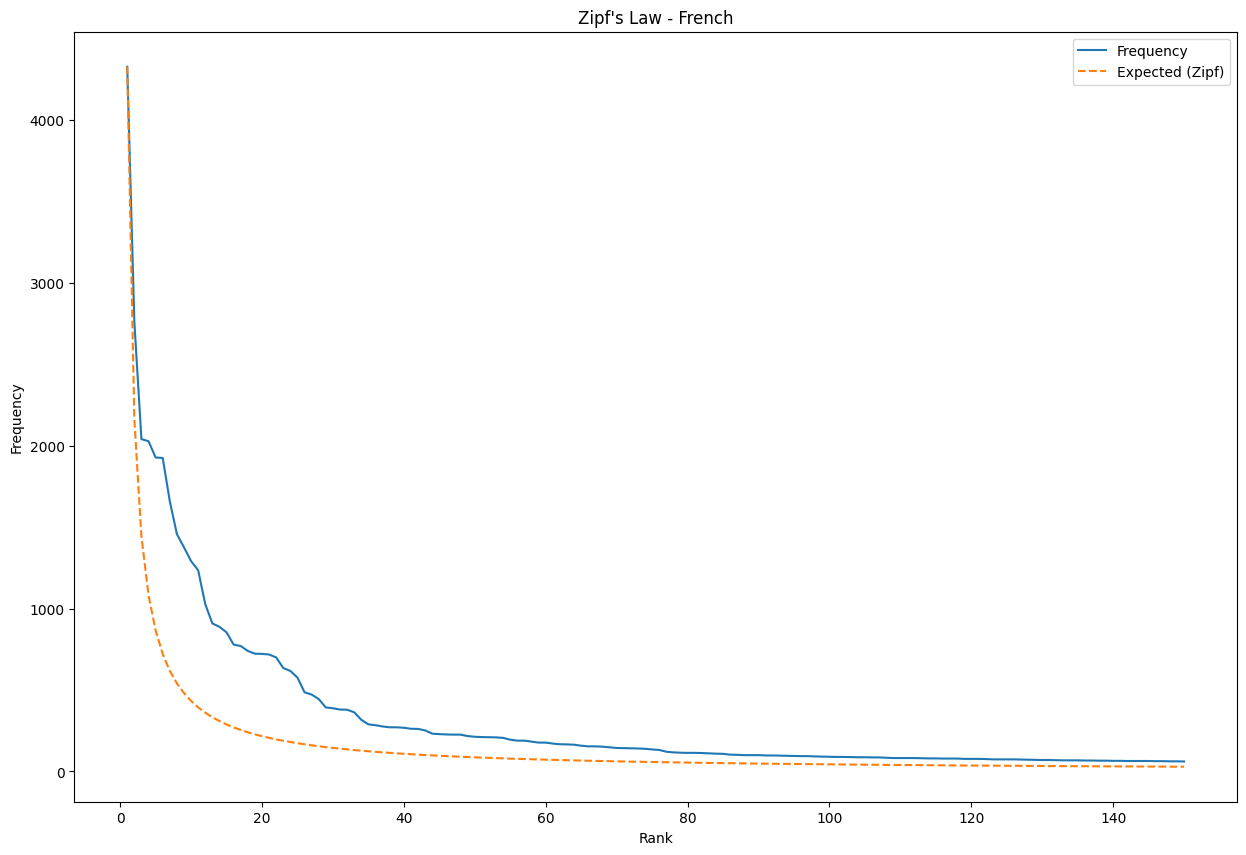

Traitement du fichier : data/spanish.txt
Rank Word       Frequency Expected (zipf)
__________________________________________________
0     de         5583     5583.0
1     la         3781     2791.5
2     que        3034     1861.0
3     en         2476     1395.75
4     el         2374     1116.6000000000001
5     y          1968     930.5 
6     a          1939     797.5714285714286
7     los        1692     697.875
8     las        987      620.3333333333333
9     se         906      558.3000000000001


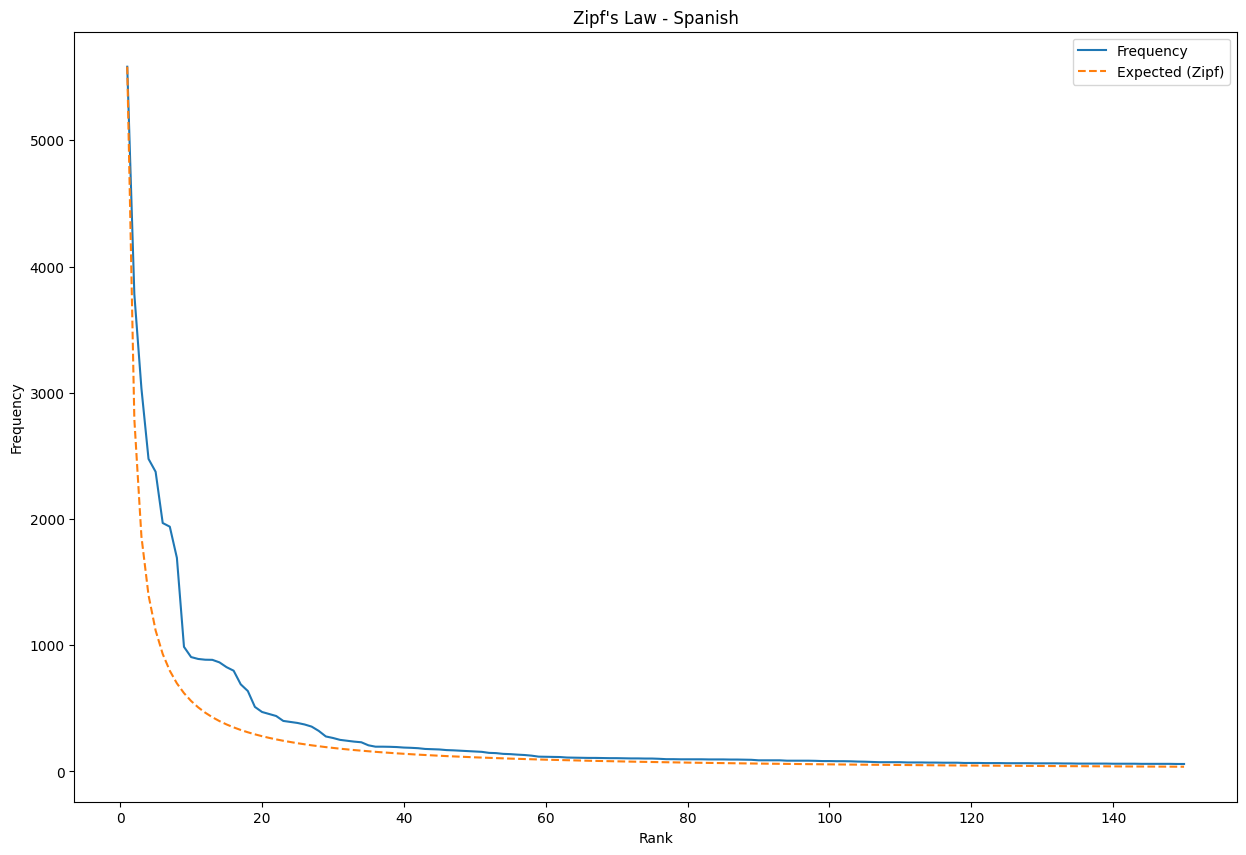

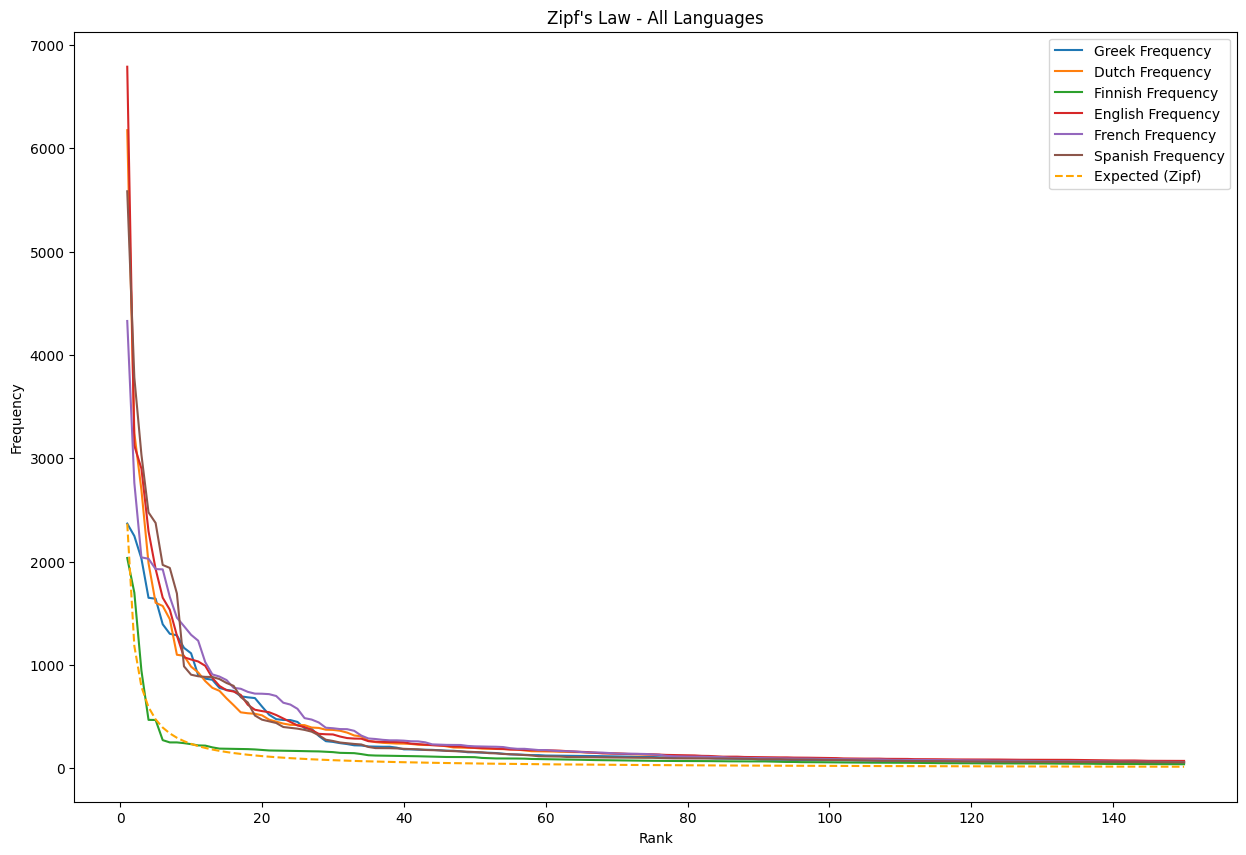

In [ ]:
import glob
import matplotlib.pyplot as pyplot

def plot_all_languages_zipf(all_languages_data, num_words=150, log=False):
    pyplot.rcParams['figure.figsize'] = [15, 10]

    rank = list(range(1, num_words + 1))
    overall_expected_zipf = []

    for i, (lang, text_zipf) in enumerate(all_languages_data.items()):
        frequency = [item[1] for item in text_zipf[:num_words]]

        if i == 0:
            overall_expected_zipf = [item[2] for item in text_zipf[:num_words]]

        pyplot.plot(rank, frequency, label=f'{lang.capitalize()} Frequency')

    if overall_expected_zipf:
        pyplot.plot(rank, overall_expected_zipf, '--', label='Expected (Zipf)', color='orange')

    if log:
        pyplot.xscale('log')
        pyplot.yscale('log')

    pyplot.legend()
    pyplot.xlabel('Rank')
    pyplot.ylabel('Frequency')
    if log:
        pyplot.title("Zipf's Law (Log-Log Scale) - All Languages")
        pyplot.savefig("zipf_all_languages_log.png")
    else:
        pyplot.title("Zipf's Law - All Languages")
        pyplot.savefig("zipf_all_languages.png")
    pyplot.show()

def process_corpus_folder(folder_path, log=False):
    file_pattern = "*.txt"
    all_languages_data = {}

    for file_path in glob.glob(f"{folder_path}/{file_pattern}"):
        print(f"Traitement du fichier : {file_path}")

        text = read_corpus(file_path)
        lang = file_path.split('/')[-1].split('.')[0]
        text = text[:500000] #A modifier selon la machine
        text_split = split_corpus(text, lang=lang)
        text_dict = content_to_dict(text_split)
        text_list = content_to_list(text_dict)

        text_zipf = compute_zipf(text_list)

        print_stats(text_zipf, 10)

        plot_zipf(text_zipf, log, num_words=150)
        if log :
          pyplot.title(f"Zipf's Law (Log-Log Scale) - {lang.capitalize()}")
          pyplot.savefig(f"zipf_{lang}_log.png")
        else:
          pyplot.title(f"Zipf's Law - {lang.capitalize()}")
          pyplot.savefig(f"zipf_{lang}.png")

        pyplot.show()
        pyplot.clf()

        all_languages_data[lang] = text_zipf

    plot_all_languages_zipf(all_languages_data, log=log)

process_corpus_folder('data', log=True)
process_corpus_folder('data', log=False)
